In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 

# Task 1: gradient descent on linear regression

In [49]:
def data_1dim(n_samples):
    k = np.random.uniform(0,3)
    b = np.random.uniform(0,3)
    X = np.linspace(1,100,n_samples)
    f_d1 = lambda x: k * x + b + (np.random.uniform(4,8) * np.log(x**2))
    y = [f_d1(i) for i in X ]
    
    return k,b,X.reshape(-1,1),np.reshape(y,(-1,1))

def hypothesis(theta,X,n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n + 1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta,X[i]))
    h = h.reshape(X.shape[0])
    
    return h

def BGD(theta,alpha,num_iters,h,X,y,n):
    cost = np.ones((num_iters,1))
    for i in range(num_iters):
        theta[0] = theta[0] - alpha/X.shape[0] * sum(h-y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) *sum((h - y) * X.transpose()[j])
            #print(theta[j])
        h = hypothesis(theta,X,n)
        cost[i] = 1/X.shape[0] * 0.5 *sum(np.square(h - y))
        
    return theta,cost

def linear_regression(X,y,alpha,n_iters):
    n = X.shape[1]
    one_mat = np.ones((X.shape[0],1))
    X = np.concatenate((one_mat,X),axis = 1)
    theta = np.zeros(n+1)
    h = hypothesis(theta,X,n)
    theta_eval,cost = BGD(theta,alpha,n_iters,h,X,y,n)
    
    return theta_eval,cost

In [70]:
from sklearn.model_selection import train_test_split
k,b,x,y= data_1dim(300)
x = (x - x.mean()) / x.std()
#x = np.c_[np.ones(x.shape[0]), x] 
print(k,b)

2.089407556793585 0.8584180048511384


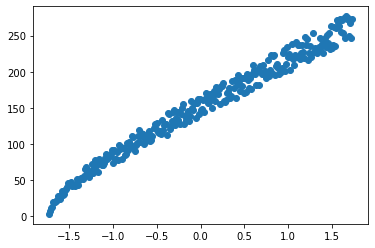

In [73]:
plt.scatter(x,y)

In [71]:
theta,cost = linear_regression(x,y.reshape(300),0.0001,100)

In [74]:
theta,cost[-1]

(array([1.49289845, 0.69050872]), array([13441.93158057]))

In [67]:
theta

array([11.13670333,  4.71829019])

# Task 2: logistic regression

In [31]:
def data_2dim(n_samples):
    X0 = np.linspace(50,150,n_samples)
    X1 = np.linspace(5,35,n_samples)
    y = np.random.randint(0,2,300)
    return np.concatenate([X0.reshape(-1,1),X1.reshape(-1,1)],axis = 1),np.reshape(y,(n_samples))

def sigmoid(X, weight):
    #%debug
    z = np.dot(X, weight[0])
    return 1 / (1 + np.exp(-z))

def BGD(theta,alpha,num_iters,h,X,y,n):
    cost = np.ones((num_iters,1))
    for i in range(num_iters):
        theta[0] = theta[0] - alpha/X.shape[0] * sum(h-y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) *sum((h - y) * X.transpose()[j])
            #print(theta[j])
        h = hypothesis_(theta,X,n)
        cost[i] = 1/X.shape[0] * 0.5 *sum(np.square(h - y))
        
    return theta,cost

def hypothesis_(theta,X,n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n + 1)
    for i in range(0,X.shape[0]):
        h[i] = sigmoid(X[i],theta)
    h = h.reshape(X.shape[0])
    
    return h 

def log_regression(X,y,alpha,n_iters):
    n = X.shape[1]
    one_mat = np.ones((X.shape[0],1))
    X = np.concatenate((one_mat,X),axis = 1)
    theta = np.zeros(n+1)
    
    h = hypothesis_(theta,X,n)
    theta_eval,cost = BGD(theta,alpha,n_iters,h,X,y,n)
    
    return theta,cost

def evaluate_model(x_test,y_test,theta):
    one_mat = np.ones((x_test.shape[0],1))
    x_test = np.concatenate((one_mat,x_test),axis = 1)
    y_predicted = np.zeros(x_test.shape[0])
    for i in range(x_test.shape[0]):
        y_predicted[i] = np.dot(x_test[i],theta)
    f_ = lambda x :0 if x < 0.5 else 1
    y_predicted = [f_(x) for x in y_predicted]
    count = 0
    for s in range(x_test.shape[0]):
        if y_predicted[s] == y_test[s]:
            count += 1
            
    return count/x_test.shape[0] * 100

In [32]:
x,y = data_2dim(300)
x = (x - x.mean()) / x.std()
X_train,Y_train = x[:250],y[:250] ## Я знаю что так нельзя делать
X_test,Y_test = x[250:],y[250:]
theta,cost = log_regression(X_train,Y_train,0.0001,1000)
accuracy = evaluate_model(X_test,Y_test,theta)
print("Точность:{0}%".format(accuracy))

Точность:66.0%


# Task 3:desision tree


## To be continued....